In [4]:
import os
os.chdir('..')

In [2]:
import detectron2_1

In [3]:
from detectron2.config import get_cfg
from pathlib import Path
from detectron2.engine import DefaultPredictor
import cv2
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from PIL import Image
import numpy as np

# Define Parameters here

In [4]:
img_path = 'data/samples/WechatIMG18.png'
cfg_path = 'output/rcnn_2/config.yaml'
weights_path = 'output/rcnn_2/model_final.pth'

conf_threshold = 0.05

# Inference

In [6]:
# Configure weights and confidence threshold
cfg = get_cfg()
cfg.merge_from_file(cfg_path)
cfg.MODEL.WEIGHTS = weights_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = conf_threshold

In [12]:
# Initialize model
predictor = DefaultPredictor(cfg)

In [9]:
# Load image as numpy array
im = cv2.imread(img_path)

In [13]:
# Perform inference
outputs = predictor(im)

In [24]:
instances = outputs['instances']
pred_classes = instances.pred_classes  # tensor
pred_boxes = instances.pred_boxes  # Boxes object
scores = instances.scores  # tensor

In [29]:
for box in pred_boxes:
    print(box)  # tensor

tensor([140.7749, 198.5905, 278.3158, 246.6720], device='cuda:0')
tensor([151.5650, 262.1803, 279.2113, 311.3343], device='cuda:0')
tensor([11.5968, 64.4906, 67.1743, 99.7197], device='cuda:0')


More info on output format: https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

# Visualization

In [7]:
# Set dataset categories
dataset = cfg.DATASETS.TRAIN[0]
MetadataCatalog.get(dataset).thing_classes = ["box", "logo"]

In [8]:
MetadataCatalog.get(dataset)

Metadata(evaluator_type='coco', image_root=PosixPath('data/benign_data/benign_database'), json_file=PosixPath('data/benign_data/coco_train.json'), name='benign_train', thing_classes=['box', 'logo'])

In [32]:
# Draw instance predictions
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(dataset))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [33]:
# Image with instance predictions as numpy array
pred = out.get_image()

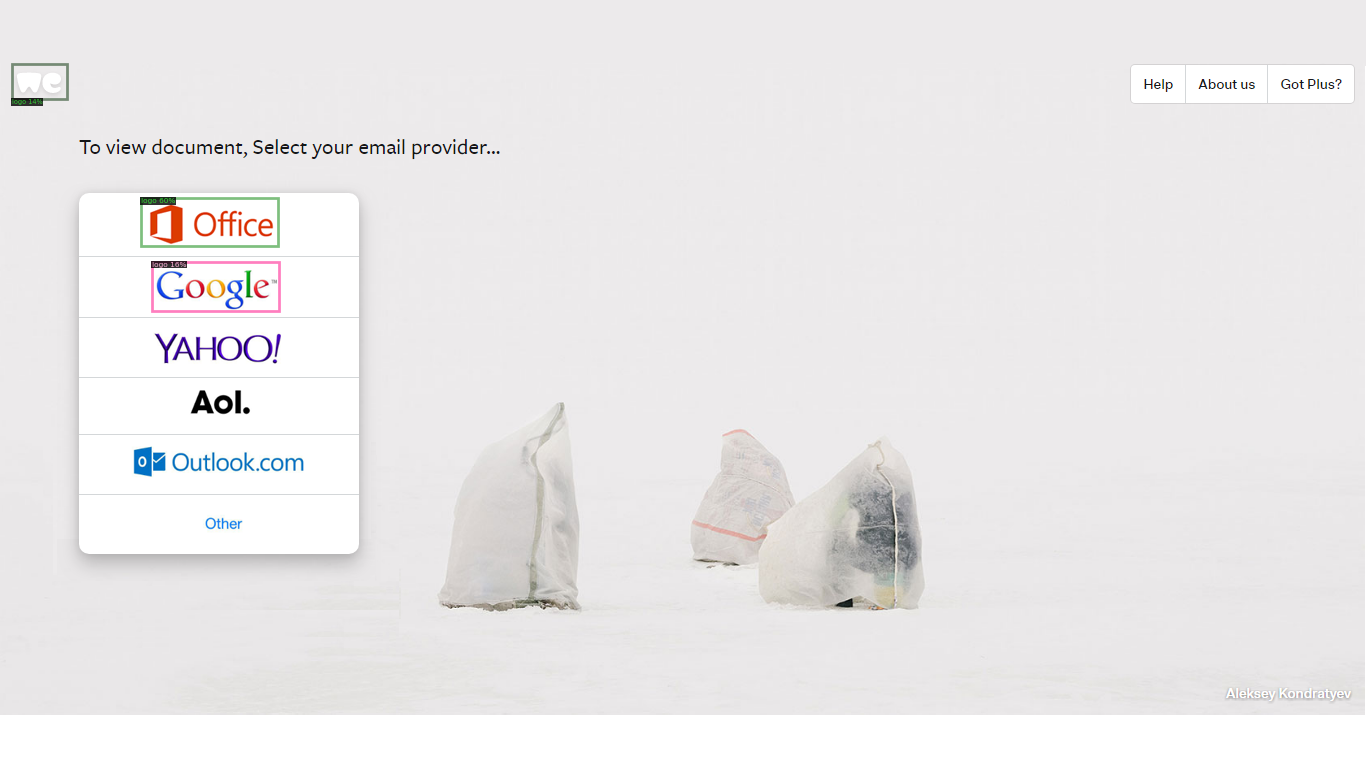

In [34]:
Image.fromarray(pred)

# Inference on Set of Images


In [5]:
from pathlib import Path
from inference import inference

In [6]:
imgs_dir = Path('data')/'bet365'
config_path = 'output/rcnn_2/config.yaml'
weights_path = 'output/rcnn_bet365/model_final.pth'
output_dir = Path('saved')/'bet365'

conf_threshold = 0.05

In [7]:
for i, img_path in enumerate(imgs_dir.rglob('*.png')):
    output_path = str(output_dir/f'{i}.png')

    inference(
        str(img_path),
        config_path,
        weights_path,
        output_path,
        conf_threshold
    )

    print(f'Saved to {output_path}')

Saved to saved/bet365/0.png
Saved to saved/bet365/1.png
Saved to saved/bet365/2.png
Saved to saved/bet365/3.png
Saved to saved/bet365/4.png
Saved to saved/bet365/5.png
Saved to saved/bet365/6.png
Saved to saved/bet365/7.png
Saved to saved/bet365/8.png
Saved to saved/bet365/9.png
Saved to saved/bet365/10.png
Saved to saved/bet365/11.png
Saved to saved/bet365/12.png
Saved to saved/bet365/13.png
Saved to saved/bet365/14.png
Saved to saved/bet365/15.png
Saved to saved/bet365/16.png
Saved to saved/bet365/17.png
Saved to saved/bet365/18.png
Saved to saved/bet365/19.png
Saved to saved/bet365/20.png
Saved to saved/bet365/21.png
Saved to saved/bet365/22.png
Saved to saved/bet365/23.png
Saved to saved/bet365/24.png
Saved to saved/bet365/25.png
Saved to saved/bet365/26.png
Saved to saved/bet365/27.png
Saved to saved/bet365/28.png
Saved to saved/bet365/29.png
Saved to saved/bet365/30.png
Saved to saved/bet365/31.png
Saved to saved/bet365/32.png
Saved to saved/bet365/33.png
Saved to saved/bet365/34